In [1]:
#importing all required python libraries
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt #use to visualize dataset vallues
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
#loading and displaying ethereum fraud dataset
dataset = pd.read_csv("Dataset/transaction_dataset.csv")
dataset

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


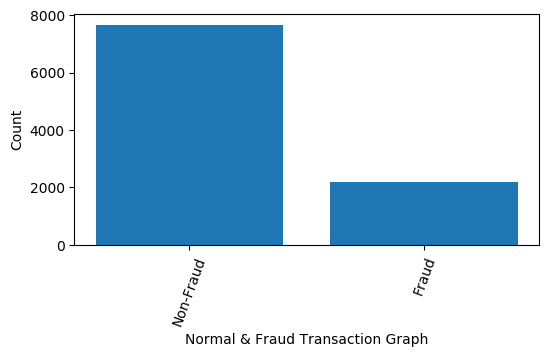

In [3]:
#visualizing different attack class labels count found in dataset
labels = ['Non-Fraud', 'Fraud']
names, count = np.unique(dataset['FLAG'], return_counts = True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (6, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Normal & Fraud Transaction Graph")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

In [4]:
#applying dataset processing technique to convert non-numeric data to numeric data
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for j in range(len(types)):
    name = types[j]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[j]] = pd.Series(le.fit_transform(dataset[columns[j]].astype(str)))#encode all str columns to numeric
        label_encoder.append([columns[j], le])
dataset.fillna(dataset.mean(), inplace = True)#replace missing values using mean imputation
dataset

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,2.717799e+05,0.0,0.0,0.0,39.000000,57.000000,63,300
1,1,2,1,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809e+00,0.0,0.0,0.0,1.000000,7.000000,154,257
2,2,3,2,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,8.000000,185,436
3,3,4,3,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3.804077e+03,0.0,0.0,0.0,1.000000,11.000000,217,436
4,4,5,4,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,1.372666e+04,0.0,0.0,0.0,6.000000,27.000000,238,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,9812,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000,1,194
9837,9837,2176,9813,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000,1,74
9838,9838,2177,9814,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,5.000000,1,185
9839,9839,2178,9815,1,0.00,0.00,0.00,0,1,0,...,11741.257297,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676,302,461


In [5]:
#applying annova features selection techniques to select relevant features
Y = dataset['FLAG'].ravel()
dataset.drop(['Unnamed: 0', 'Index', 'FLAG'], axis = 1,inplace=True)
columns = dataset.columns
X = dataset.values
selector = SelectKBest(f_classif, k="all") # k is the number of features to be selected
X = selector.fit_transform(X, Y)
scores = selector.scores_
feature_scores = list(zip(scores,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)
selected = []
for i in range(len(sorted_feature_scores)):
    arr = sorted_feature_scores[i]
    if arr[0] > 0:
        selected.append([arr[0], arr[1]])
selected = sorted(selected,reverse=True)
features_importance = np.asarray(selected)
selected = features_importance[:,1]
selected = selected[0:17]
scores = pd.DataFrame(features_importance, columns=['Importance Score', 'Feature Name'])
scores = scores.iloc[0:17]
scores

,Importance Score,Feature Name
0,1697.5951181138753,ERC20_most_rec_token_type
1,769.6746933361841,Time Diff between first and last (Mins)
2,410.2918214476211,ERC20 most sent token type
3,186.2198492691196,Address
4,140.20948761229513,Avg min between received tnx
5,99.96487142419745,total transactions (including tnx to create co...
6,62.289591465582845,Received Tnx
7,60.236253330808914,Sent tnx
8,39.90486682601089,avg val sent
9,20.48692038869679,Unique Sent To Addresses


In [6]:
#select important features and then perform normalization
print("Total features found in dataset before applying ANOVA : "+str(dataset.shape[1]))
np.save("model/selected", selected)
dataset = dataset[selected]
X = dataset.values
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Total features found in dataset after applying ANOVA : "+str(X.shape[1]))

Total features found in dataset before applying ANOVA : 48
Total features found in dataset after applying ANOVA : 17


In [7]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print("Train & Test Dataset Split")
print("80% records used to train algorithms : "+str(X_train.shape[0]))
print("20% records features used to test algorithms : "+str(X_test.shape[0]))
data = np.load("model/data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = data

Train & Test Dataset Split
80% records used to train algorithms : 6888
20% records features used to test algorithms : 2953


In [8]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [9]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    labels = ['Deny', 'Allow']
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

Logistic Regression Accuracy  : 86.14967829326109
Logistic Regression Precision : 84.9557809858239
Logistic Regression Recall    : 72.8670428456619
Logistic Regression FSCORE    : 76.4702249554011


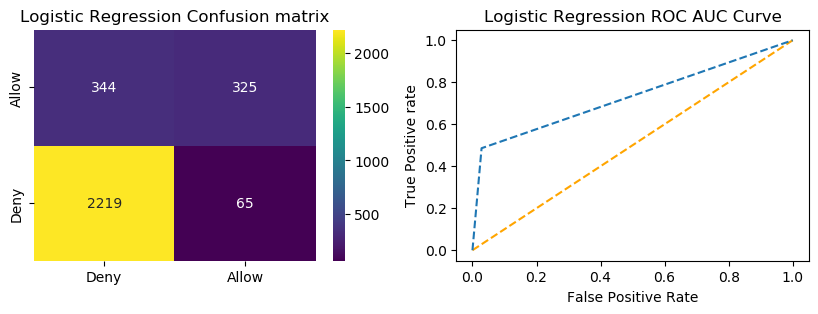

In [10]:
#training Logistic regression ML algorithm on 80% training data and then evaluating performance on 20% test data
lr_cls = LogisticRegression(max_iter=300, penalty="l1", solver="saga")#defining hyper parameters
#training on train data
lr_cls.fit(X_train, y_train)
#perfrom prediction on test data
predict = lr_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Logistic Regression", y_test, predict)

SVM Accuracy  : 89.0958347443278
SVM Precision : 86.45671470149345
SVM Recall    : 80.9546949075783
SVM FSCORE    : 83.22455100384602


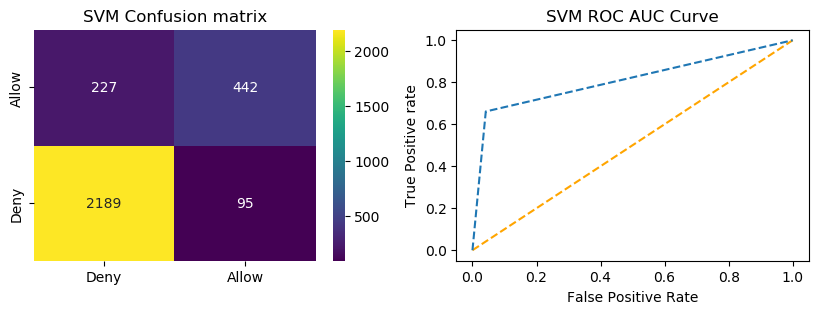

In [11]:
#training SVM ML algorithm on 80% training data and then evaluating performance on 20% test data
svm_cls = svm.SVC(C=3.0, kernel="sigmoid")#defining hyper parameters
#training on train data
svm_cls.fit(X_train, y_train)
#perfrom prediction on test data
predict = svm_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("SVM", y_test, predict)

Random Forest Accuracy  : 98.34067050457162
Random Forest Precision : 98.89001311830894
Random Forest Recall    : 96.39066463524773
Random Forest FSCORE    : 97.57136874755055


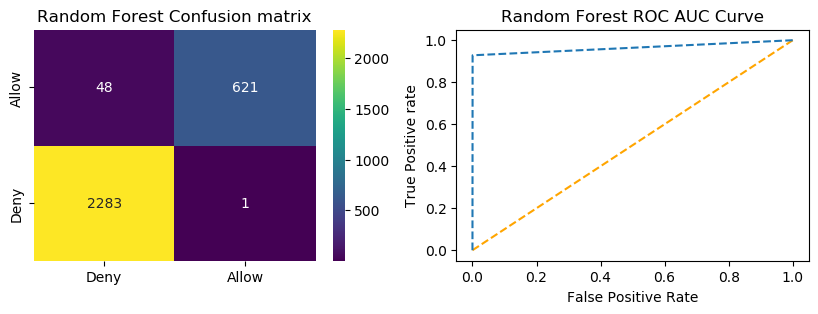

In [12]:
#training Random Forest ML algorithm on 80% training data and then evaluating performance on 20% test data
rf_cls = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=5)
#training on train data
rf_cls.fit(X_train, y_train)
#perfrom prediction on test data
predict = rf_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Random Forest", y_test, predict)

XGBoost Accuracy  : 99.3227226549272
XGBoost Precision : 99.34715394120673
XGBoost Recall    : 98.71661967701486
XGBoost FSCORE    : 99.02751157567495


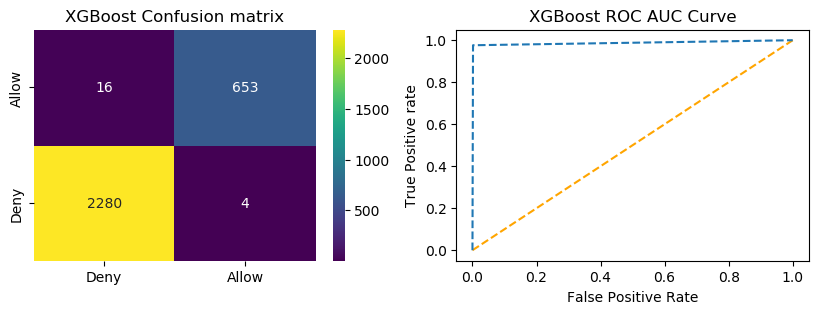

In [13]:
#training XGBClassifier ML algorithm on 80% training data and then evaluating performance on 20% test data
xg_cls = XGBClassifier(max_depth=4, scale_pos_weight=1)
#training on train data
xg_cls.fit(X_train, y_train)
#perfrom prediction on test data
predict = xg_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("XGBoost", y_test, predict)

[LightGBM] [Info] Number of positive: 1510, number of negative: 5378
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3738
[LightGBM] [Info] Number of data points in the train set: 6888, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219222 -> initscore=-1.270207
[LightGBM] [Info] Start training from score -1.270207
LightGBM Accuracy  : 99.35658652218083
LightGBM Precision : 99.42306109772025
LightGBM Recall    : 98.73851109557879
LightGBM FSCORE    : 99.07564056624368


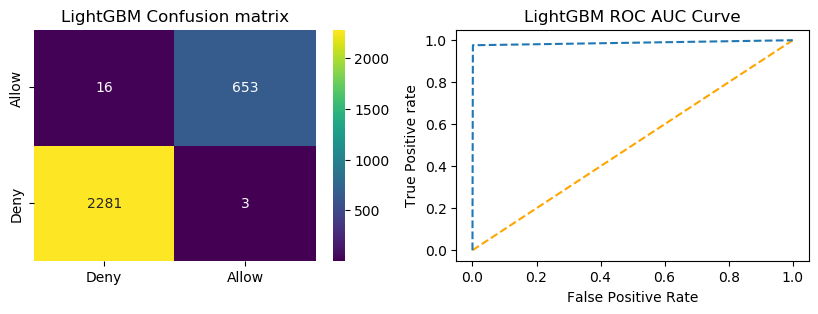

In [14]:
#training LGBMClassifier ML algorithm on 80% training data and then evaluating performance on 20% test data
lg_cls = LGBMClassifier(learning_rate=0.1)
#training on train data
lg_cls.fit(X_train, y_train)
#perfrom prediction on test data
predict = lg_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("LightGBM", y_test, predict)



Extension CNN2D Accuracy  : 99.52590585844904
Extension CNN2D Precision : 99.69538729329852
Extension CNN2D Recall    : 98.95366218236174
Extension CNN2D FSCORE    : 99.31852737824747


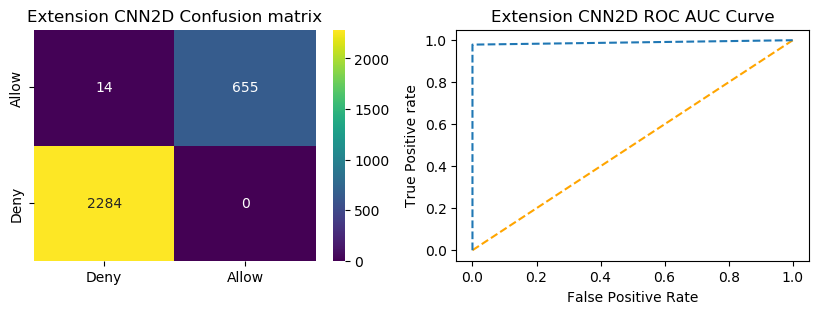

In [15]:
#employing CNN2D advance deep learning algorithm with multiple neurons to optimize features using differnet layers
#which help CNN obtaining better accuracy
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
cnn_model = Sequential()
#defining CNN with 32 neurons of 1 X 1 matrix to filter features 32 times
cnn_model.add(Convolution2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer collect filtered features from CNN layer
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#adding another layer to further optimizing features
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output prediction dense layer
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
#compiling, training and laoding model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 16, epochs = 30, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
#perfrom prediction on test data
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Extension CNN2D", y_test1, predict)

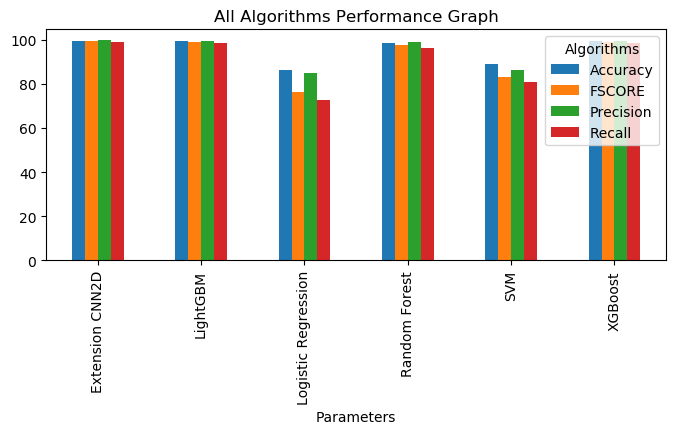

In [16]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['Logistic Regression','Accuracy',accuracy[0]],['Logistic Regression','Precision',precision[0]],['Logistic Regression','Recall',recall[0]],['Logistic Regression','FSCORE',fscore[0]],
                   ['SVM','Accuracy',accuracy[1]],['SVM','Precision',precision[1]],['SVM','Recall',recall[1]],['SVM','FSCORE',fscore[1]],
                   ['Random Forest','Accuracy',accuracy[2]],['Random Forest','Precision',precision[2]],['Random Forest','Recall',recall[2]],['Random Forest','FSCORE',fscore[2]],
                   ['XGBoost','Accuracy',accuracy[3]],['XGBoost','Precision',precision[3]],['XGBoost','Recall',recall[3]],['XGBoost','FSCORE',fscore[3]],
                   ['LightGBM','Accuracy',accuracy[4]],['LightGBM','Precision',precision[4]],['LightGBM','Recall',recall[4]],['LightGBM','FSCORE',fscore[4]],
                   ['Extension CNN2D','Accuracy',accuracy[5]],['Extension CNN2D','Precision',precision[5]],['Extension CNN2D','Recall',recall[5]],['Extension CNN2D','FSCORE',fscore[5]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(8, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [17]:
#display all algorithm performnace
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'LightGBM', 'Extension CNN2D']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Logistic Regression,86.149678,84.955781,72.867043,76.470225
1,SVM,89.095835,86.456715,80.954695,83.224551
2,Random Forest,98.340671,98.890013,96.390665,97.571369
3,XGBoost,99.322723,99.347154,98.716620,99.027512
4,LightGBM,99.356587,99.423061,98.738511,99.075641
5,Extension CNN2D,99.525906,99.695387,98.953662,99.318527
